# Toilet paper consumption problem

Imports and set magics:

In [58]:
import numpy as np
from scipy import stats as st
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import math as m
import time            

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this analysis, we wish to find the optimal consumption of toilet paper rolls for a consumer, here defined as the entire household. The initial amount of toilet paper is 10 rolls that needs to be split over an whole week. 

<b>Theory<b>

We consider an Euler Equation where the consumer preferences in each period, t, follows the condition: 
* $u(c_t)$ = $ln(c_t)$

The consumption in future periods is discounted with factor $β<1$
indicating the time-preference of the consumer.

The present value of the consumption path set in period 0 is given by:
* $V(c_0, c_1,..., c_T)$ = $\sum_{t=0}^T$ $\beta^t U(c_t)$

The consumer wishes to optimize his consumption for every period, $t=0, ..., T$ but for period $t+1$ the amount left to consume is smaller by the amount consumed the period before, given by

* $k_{t+1}$ = $k_t - c_t$

Therefore the following restriction must hold
* $k_t \geq 0$


# Analytical solution of the problem

######WRITE the analytical solution that we want to derive using **sympy** 


####$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$

First we define all **symbols**:

In [59]:
t = 7
beta = 0.7
k = np.zeros(t+1,float)
c = np.zeros(t+1,float)
u = np.zeros(t+1,float)
k[0] = 10  # k0
c[0] = (1.0-beta)/(1.0-beta**(t+1)) * k[0]  # c0
u[0] = np.log(c[0])

for i in range(1,t+1):
    #print "i=" + str(i)
    c[i] = beta * c[i-1]
    k[i] = k[i-1] - c[i-1]

    # Period utility with discounting
    u[i] = beta**(i-1)*np.log(c[i])

np.sum(u)  # total utility

print("c = " + str(c))
print("k = " + str(k))

c = [3.18352381 2.22846667 1.55992667 1.09194867 0.76436407 0.53505485
 0.37453839 0.26217688]
k = [10.          6.81647619  4.58800952  3.02808285  1.93613418  1.17177012
  0.63671527  0.26217688]


Next we **plot** the function

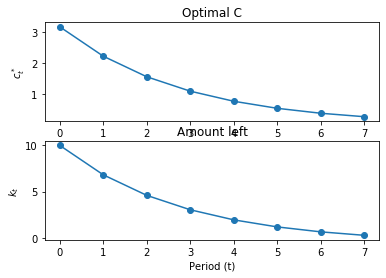

In [60]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
#
ax[0].plot(c, '-o')
ax[0].set_ylabel(r'$c^*_t$')
ax[0].set_xlabel('Period (t)')
ax[0].set_title('Optimal C')
#
#
#
ax[1].plot(k, '-o')
ax[1].set_ylabel(r'$k_t$')
ax[1].set_xlabel('Period (t)')
ax[1].set_title('Amount left')
#
plt.show()

###WRITE SOMETHING ABOUT FINDINGS

## Numerical solution

We can re-write the equation for the steady state capital per capita as

\\[ 0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} \\]

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by a **bisection method**.

Define the model **parameters**:

In [61]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

**Solve numerically** for the steady state:

In [62]:
solution = modelproject.solve_for_ss(s,g,n,alpha,delta)

print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')
print(f' numerical solution is: {solution.root:.3f}')

analytical solution is: 1.904
 numerical solution is: 1.904


# Further analysis

ADD FURTHER ANALYSIS, VISUALIZATIONS AND EXTENSIONS.

# Conclusion

ADD CONCISE CONCLUSION.